# Loan Default Risk Prediction 

### Source Link
https://www.kaggle.com/code/crucifer/houseloan-data-analysis/data

### Introduction
- Defaulter- customers who are not capable of paying the loan
- Non - Defaulter – Customers who are capable of paying the Loan

#### Goal
- The goal of this project is to come up with a loan defaulter prediction model that identify potential customers and predict likelihood of defaulter.

#### Business Needs
- This will enable the loan servicing institution to make decisions on issuing loans, so that the risk can be lowered
- The profit can be maximized and  help the marketing team to shift their focus  on those customers who show low risk of defaulting


### Target- Definition
"TARGET"- whether there was defaulter or non defaulter 

### Project Overview
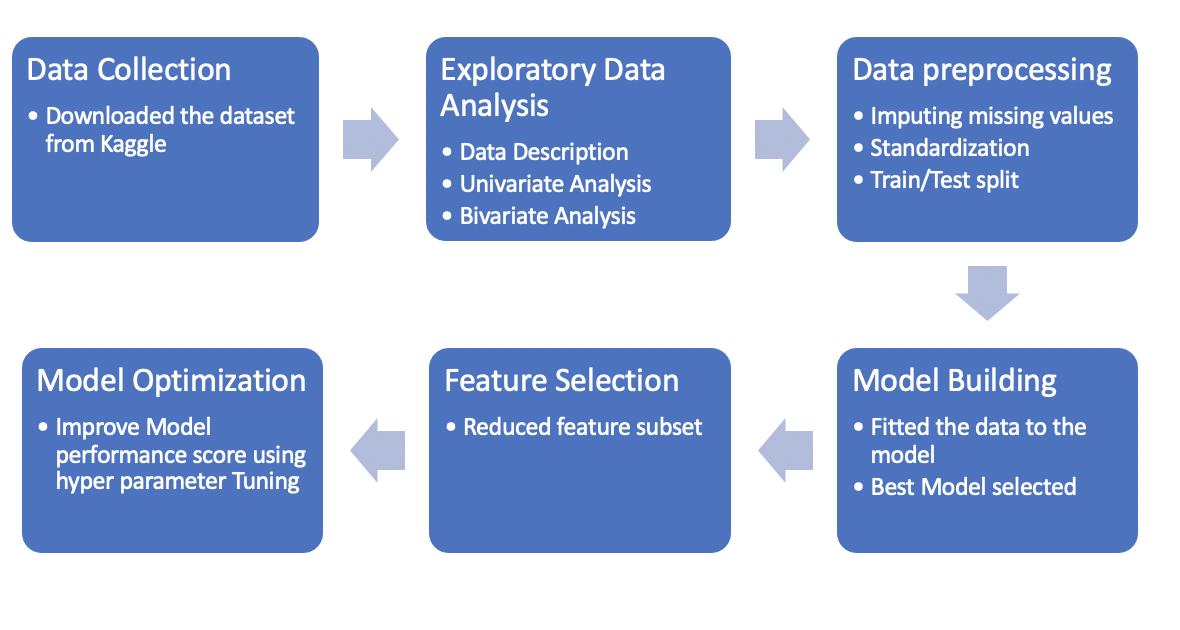

### Read Data into DF

In [1]:
#Import numpy for array manipulation 
#Import pandas for dataframe manipulation 
import numpy as np
import pandas as pd
from math import floor
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#1. Read Data into Pandas dataframe
df = pd.read_csv("loan_data.csv", na_values=' ') 
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### Check for number of features (columns >= 30) and instances (rows >= 100000)

In [2]:
#2. Check for number of rows and columns
rows_r = df.shape[0]
cols_r = df.columns
if rows_r >= 100000 and len(cols_r) >= 30:
    print("Number of rows in raw dataset = " +str(df.shape[0]) + "\nNumber of columns in raw dataset = " +str(df.shape[1]) +
          "\n"'\033[1mThus project requirement is satisfied.\033[0m')
else:
    print("There are less than 100000 rows and 30 features in raw dataset. Thus project requirement is not satisfied.\n")

Number of rows in raw dataset = 307511
Number of columns in raw dataset = 122
Thus project requirement is satisfied.


### Check for Nulls
Check for other missing value - display unique values for each feature

In [3]:
# Check for nulls in dataset
null_count = df.isnull().sum().sum()
null_percent = null_count/(df.size)
if null_percent < 0.05 or null_percent > 0.10: 
    print("\nNumber of nulls in dataset = " + str(null_count) + ", i.e. the percentage of Nulls = " + str(null_percent))


# Check to identify other missing values
df.isna().sum()


Number of nulls in dataset = 9152465, i.e. the percentage of Nulls = 0.24395941907129431


SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

### Checking the datatypes of each columns

In [4]:
#check the data types of all columns
df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


## Exploratory Data Analysis

### Print the summary Statistics

In [5]:
#Display the summary statistics using describe
describe=df.describe(include='all').T
describe

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,NaN,NaN,NaN,278180.518577,102790.175348,100002.0,189145.5,278202.0,367142.5,456255.0
TARGET,307511.0,NaN,NaN,NaN,0.080729,0.272419,0.0,0.0,0.0,0.0,1.0
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CODE_GENDER,307511,3,F,202448,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_OWN_CAR,307511,2,N,202924,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_OWN_REALTY,307511,2,Y,213312,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,307511.0,NaN,NaN,NaN,0.417052,0.722121,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,307511.0,NaN,NaN,NaN,168797.919297,237123.146279,25650.0,112500.0,147150.0,202500.0,117000000.0
AMT_CREDIT,307511.0,NaN,NaN,NaN,599025.999706,402490.776996,45000.0,270000.0,513531.0,808650.0,4050000.0
AMT_ANNUITY,307499.0,NaN,NaN,NaN,27108.573909,14493.737315,1615.5,16524.0,24903.0,34596.0,258025.5


In [6]:
# Export the data description into an excel file
describe.to_excel('describe.xlsx')

In [7]:
#understand the dataset using info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


## Analysis on categorical Features

### Target Rates

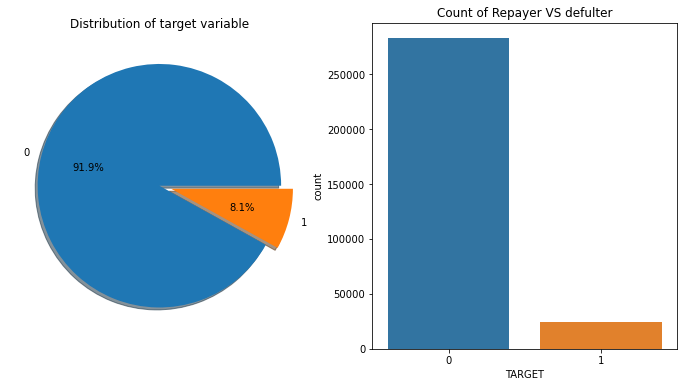

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#plot the pie chart to understand the percentage of defaulters and Repayers
fig,ax=plt.subplots(1,2,figsize=(12,6))
df.TARGET.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Distribution of target variable')
ax[0].set_ylabel('')

#count plot to understand the frequency of Repayer and defaulter
sns.countplot('TARGET',data=df,ax=ax[1])
ax[1].set_title('Count of Repayer VS defulter')
plt.show()

Only 8.1% of the records are defaulters(class label 1), and the remaining 91.9% of the records correspond to non-defaulters (class label 0).

### Percentage Defaulter by Gender

In [9]:
# replace gender category XNA with the most frequent category
df['CODE_GENDER'].replace('XNA','F',inplace=True)

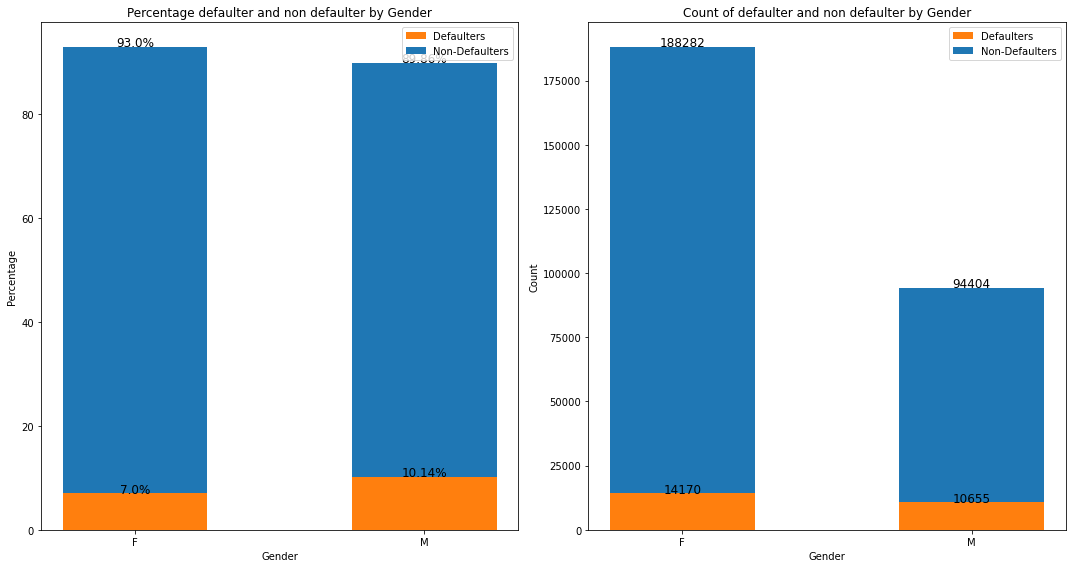

In [10]:
#Stacked bar plots for understanding the impact of Gender feature on Loan default status
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,8))

#subplot 1 representing Percentage defaulter and non defaulter by Gender
x,y='CODE_GENDER','TARGET'
df_q=df.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index()
g=ax1.bar(x=x,height='percent',data=df_q,width=0.5,color=['tab:orange','tab:blue'],label = 'Defaulters')
g=ax1.bar(x=x,height='percent',data=df_q,width=0.5,color=['tab:blue','tab:orange'],label = 'Non-Defaulters')
for p in g:
    height=p.get_height().round(decimals=2)
    ax1.text(x=p.get_x()+p.get_width()/2,y=height+.10,
           s="{}%".format(height),
           ha='center',fontsize=12)
ax1.set_ylabel('Percentage')
ax1.set_xlabel('Gender')
ax1.legend(loc = 'upper right')
ax1.set_title('Percentage defaulter and non defaulter by Gender')
x,y='CODE_GENDER','TARGET'
df_r=df.groupby(x)[y].value_counts().rename('count').reset_index()
colors = {'Non Defaulter':'red', 'Defaulter':'green'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

#subplot 2 representing count of defaulter and non defaulter by Gender
g=ax2.bar(x=x,height='count',width=0.5,data=df_r,color=['tab:orange','tab:blue'], label = 'Defaulters')
g=ax2.bar(x=x,height='count',width=0.5,data=df_r,color=['tab:blue','tab:orange'], label = 'Non-Defaulters')
for p in g:
    height=p.get_height().round(decimals=2)
    ax2.text(x=p.get_x()+p.get_width()/2,y=height+.10,
           s="{}".format(height),
           ha='center',fontsize=12)
ax2.set_ylabel('Count')
ax2.set_xlabel('Gender')
ax2.legend(loc = 'upper right')
ax2.set_title('Count of defaulter and non defaulter by Gender')
ax2.legend()
plt.tight_layout()
plt.show()

Women took more number of loans as compared to Men.Women are slightly more capable of repaying the loan as compared to men.Men are able to repay their loans in 89.86% of the cases, Women are able to repay in 93.0% of the cases. There are entries where Gender=’XNA’. Since this is not providing us with much information, we removed those entries.

### Percentage defaulter by whether a person has car or not

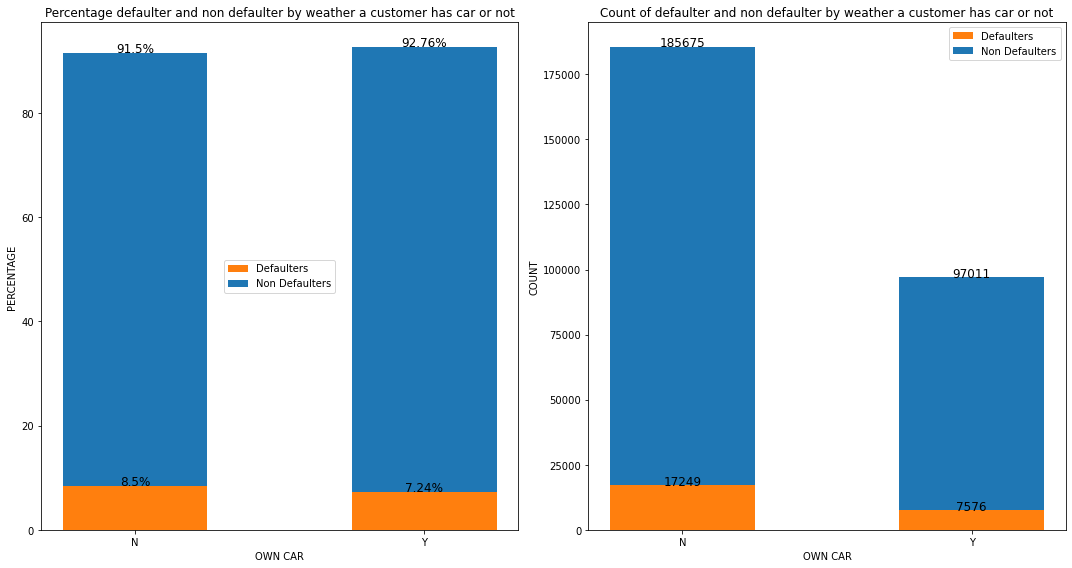

In [11]:
#Stacked bar plots for understanding the impact of customer owning a car on Loan default status
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,8))

#subplot 1 representing Percentage defaulter and non defaulter by customer owning a car
x,y='FLAG_OWN_CAR','TARGET'
df_q=df.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index()
g=ax1.bar(x=x,height='percent',data=df_q,width=0.5,color=['tab:orange','tab:blue'],label='Defaulters')
g=ax1.bar(x=x,height='percent',data=df_q,width=0.5,color=['tab:blue','tab:orange'],label='Non Defaulters')
for p in g:
    height=p.get_height().round(decimals=2)
    ax1.text(x=p.get_x()+p.get_width()/2,y=height+.10,
           s="{}%".format(height),
           ha='center',fontsize=12)
ax1.set_ylabel('PERCENTAGE')
ax1.set_xlabel('OWN CAR')
ax1.legend(loc='center')
ax1.set_title('Percentage defaulter and non defaulter by weather a customer has car or not')
x,y='FLAG_OWN_CAR','TARGET'
df_r=df.groupby(x)[y].value_counts().rename('count').reset_index()
col=['Non Defaulter','Defaulter']

#subplot 2 representing count of defaulter and non defaulter by customer owning a car
g=ax2.bar(x=x,height='count',width=0.5,data=df_r,color=['tab:orange','tab:blue'],label='Defaulters')
g=ax2.bar(x=x,height='count',width=0.5,data=df_r,color=['tab:blue','tab:orange'],label='Non Defaulters')
for p in g:
    height=p.get_height().round(decimals=2)
    ax2.text(x=p.get_x()+p.get_width()/2,y=height+.10,
           s="{}".format(height),
           ha='center',fontsize=12)
ax2.set_ylabel('COUNT')
ax2.set_xlabel('OWN CAR')
ax2.legend(loc='upper right')
ax2.set_title('Count of defaulter and non defaulter by weather a customer has car or not')
ax2.legend()
plt.tight_layout()
plt.show()

Most of the applicants for loans do not own a car. However, there is not much difference in the loan defaulter status for the customer based on this information (8.5% and 7.2% respectively).

### Percentage defaulter by whether a person has realty or not

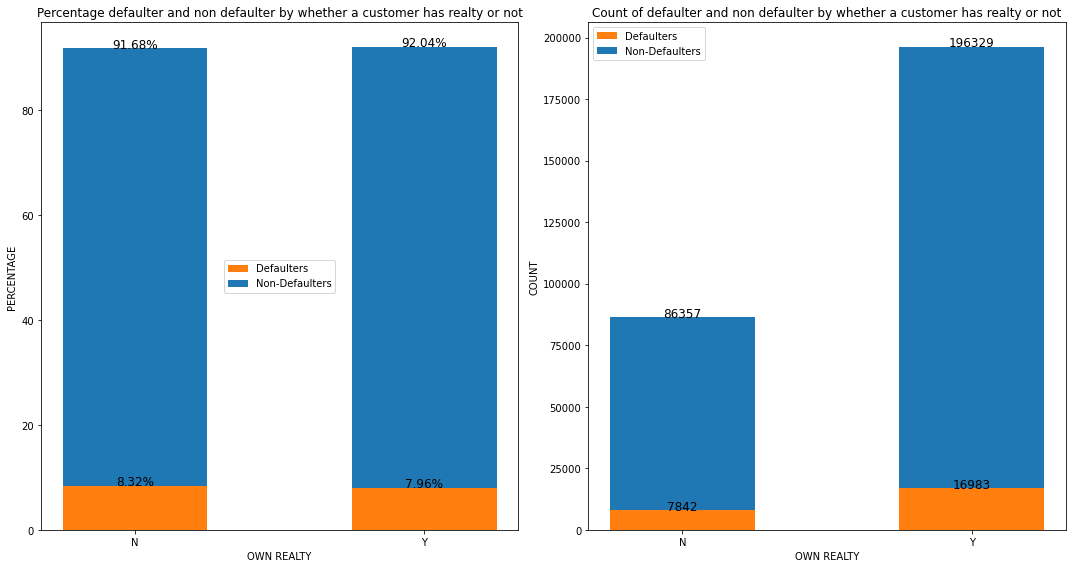

In [12]:
#stacked bar plots for understanding the impact of customer owning a realty on Loan default status
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,8))

#subplot 1 representing Percentage defaulter and non defaulter by customer owning a realty
x,y='FLAG_OWN_REALTY','TARGET'
df_q=df.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index()
g=ax1.bar(x=x,height='percent',data=df_q,width=0.5,color=['tab:orange','tab:blue'],label = 'Defaulters')
g=ax1.bar(x=x,height='percent',data=df_q,width=0.5,color=['tab:blue','tab:orange'],label = 'Non-Defaulters')
ax1.legend(loc='center')
for p in g:
    height=p.get_height().round(decimals=2)
    ax1.text(x=p.get_x()+p.get_width()/2,y=height+.10,
           s="{}%".format(height),
           ha='center',fontsize=12)
ax1.set_ylabel('PERCENTAGE')
ax1.set_xlabel('OWN REALTY')
ax1.set_title('Percentage defaulter and non defaulter by whether a customer has realty or not')
x,y='FLAG_OWN_REALTY','TARGET'
df_r=df.groupby(x)[y].value_counts().rename('count').reset_index()
col=['Non Defaulter','Defaulter']

#subplot 2 representing Percentage defaulter and non defaulter by customer owning a realty
g=ax2.bar(x=x,height='count',width=0.5,data=df_r,color=['tab:orange','tab:blue'], label = 'Defaulters')
g=ax2.bar(x=x,height='count',width=0.5,data=df_r,color=['tab:blue','tab:orange'], label = 'Non-Defaulters')
ax2.legend(loc='upper right')
for p in g:
    height=p.get_height().round(decimals=2)
    ax2.text(x=p.get_x()+p.get_width()/2,y=height+.10,
           s="{}".format(height),
           ha='center',fontsize=12)
ax2.set_ylabel('COUNT')
ax2.set_xlabel('OWN REALTY')
ax2.set_title('Count of defaulter and non defaulter by whether a customer has realty or not')
ax2.legend()
plt.tight_layout()
plt.show()

Most of the applicants for loans own a flat/house. There is not much difference in the loan defaulter status for the customer based on this information (8.32% and 7.96% respectively).

### Percentage defaulter by education type of the customers- Bivariate Analysis

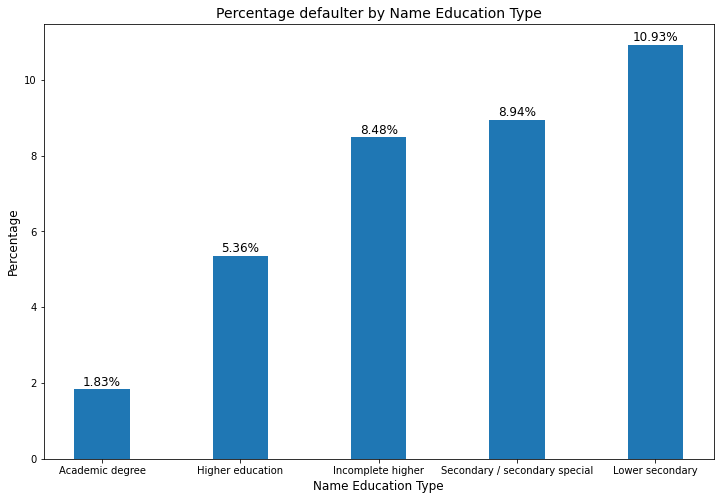

In [13]:
#bar plot depicting the loan defaulter percentage across various education types of the customers
plt.figure(figsize=(12,8))
x,y='NAME_EDUCATION_TYPE','TARGET'
df_q=df.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index()
df_q1=df_q.loc[df_q['TARGET']==1]
df_sorted2 = df_q1.sort_values('percent')
df_sorted1=df_sorted2['percent'].round(decimals = 2)
g=plt.bar(x=x,height='percent',width=0.4,data=df_sorted2)
for p in g:
    height=p.get_height().round(decimals=2)
    plt.text(x=p.get_x()+p.get_width()/2,y=height+.10,
           s="{}%".format(height),
           ha='center',fontsize=12)
plt.xlabel("Name Education Type",fontsize='12')
plt.ylabel("Percentage",fontsize='12')
plt.title('Percentage defaulter by Name Education Type',fontsize='14')
plt.show()


When a customer is having higher level of eduation then the loan default is less which is 1.83%compared to the customers with low level of education which is 10.93%.The default rate increases when customers level of education is low.

#### Percentage default by Family Status

In [14]:
#dropping the Unknown rows from family status for meaningful insights
df.drop(df.index[(df["NAME_FAMILY_STATUS"] == "Unknown")],axis=0,inplace=True)

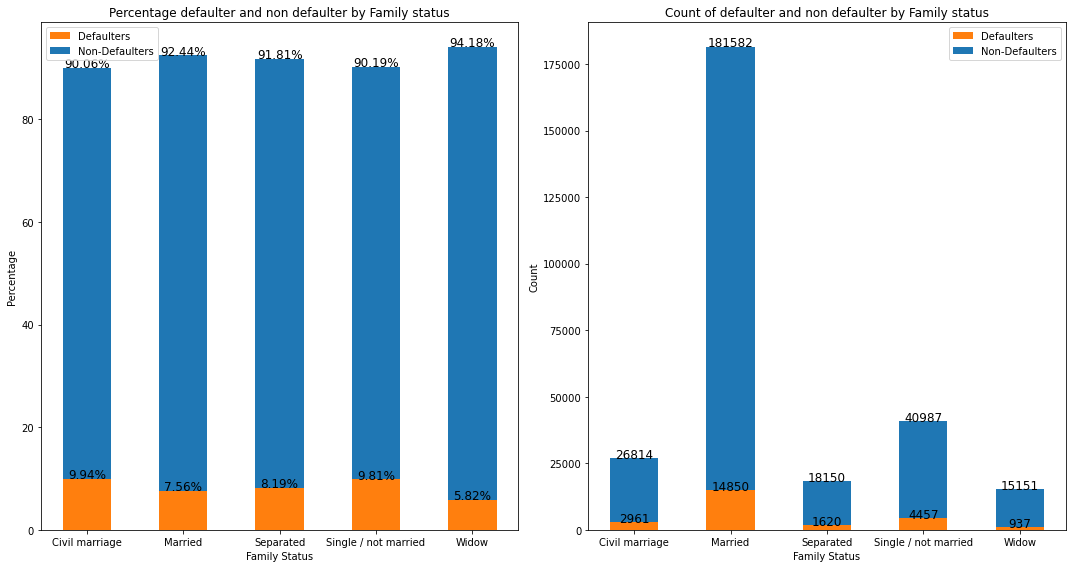

In [15]:
#stacked bar plots for understanding the impact of customer family status on Loan default status
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,8))

#subplot 1 representing Percentage defaulter and non defaulter by customer family status
x,y='NAME_FAMILY_STATUS','TARGET'
df_q=df.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index()
g=ax1.bar(x=x,height='percent',data=df_q,width=0.5,color=['tab:orange','tab:blue'],label = 'Defaulters')
g=ax1.bar(x=x,height='percent',data=df_q,width=0.5,color=['tab:blue','tab:orange'],label = 'Non-Defaulters')
ax1.legend(loc='upper left')
for p in g:
    height=p.get_height().round(decimals=2)
    ax1.text(x=p.get_x()+p.get_width()/2,y=height+.10,
           s="{}%".format(height),
           ha='center',fontsize=12)
ax1.set_ylabel('Percentage')
ax1.set_xlabel('Family Status')
ax1.set_title('Percentage defaulter and non defaulter by Family status')
x,y='NAME_FAMILY_STATUS','TARGET'
df_r=df.groupby(x)[y].value_counts().rename('count').reset_index()
col=['Non Defaulter','Defaulter']

#subplot 2 representing count of defaulter and non defaulter by customer family status
g=ax2.bar(x=x,height='count',width=0.5,data=df_r,color=['tab:orange','tab:blue'], label = 'Defaulters')
g=ax2.bar(x=x,height='count',width=0.5,data=df_r,color=['tab:blue','tab:orange'], label = 'Non-Defaulters')
ax2.legend(loc='upper right')
for p in g:
    height=p.get_height().round(decimals=2)
    ax2.text(x=p.get_x()+p.get_width()/2,y=height+.10,
           s="{}".format(height),
           ha='center',fontsize=12)
ax2.set_ylabel('Count')
ax2.set_xlabel('Family Status')
ax2.set_title('Count of defaulter and non defaulter by Family status')
ax2.legend()
plt.tight_layout()
plt.show()

Married people apply for the most number of loans.The customers who comes under the category Civil marriage has the most defaulted loans.

### Percentage defaulter by Income type

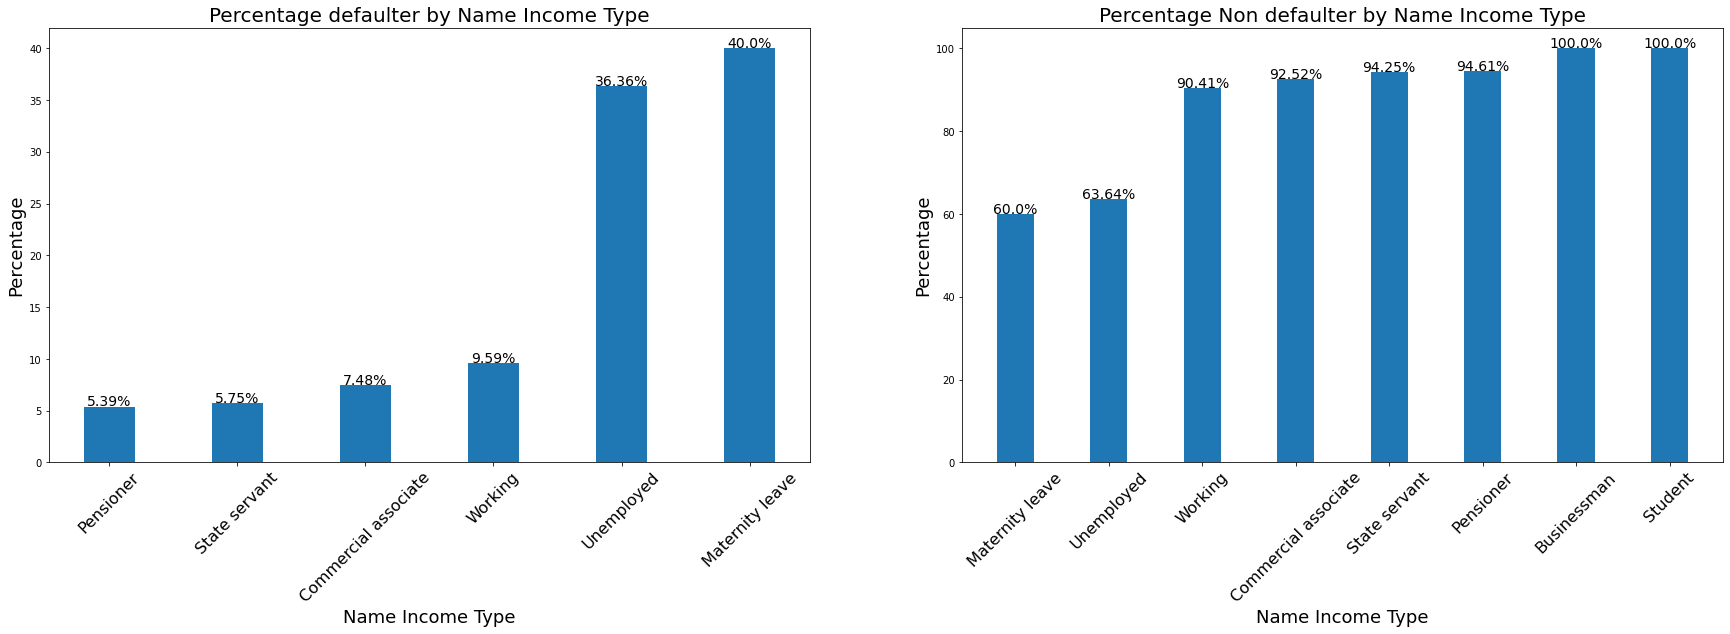

In [16]:
#bar plots for understanding the impact of customer income type on Loan default status
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(30,8))

#bar plot 1 representing Percentage defaulter by customer income type
x,y='NAME_INCOME_TYPE','TARGET'
df_q=df.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index()
df_q1=df_q.loc[df_q['TARGET']==1]
df_q2=df_q.loc[df_q['TARGET']==0]
df_sorted2 = df_q1.sort_values('percent')
df_sorted3 = df_q2.sort_values('percent')
df_sorted1=df_sorted2['percent'].round(decimals = 2)
g=ax1.bar(x=x,height='percent',width=0.4,data=df_sorted2)
for p in g:
    height=p.get_height().round(decimals=2)
    ax1.text(x=p.get_x()+p.get_width()/2,y=height+.10,
           s="{}%".format(height),
           ha='center',fontsize=14)
ax1.set_ylabel('Percentage',fontsize=18)
ax1.set_xlabel('Name Income Type',fontsize=18)
ax1.set_title('Percentage defaulter by Name Income Type',fontsize=20)
ax1.tick_params(axis='x', labelsize=16, rotation=45)

#bar plot 2 representing Percentage Non defaulter by customer income type
g=ax2.bar(x=x,height='percent',width=0.4,data=df_sorted3)
for p in g:
    height=p.get_height().round(decimals=2)
    ax2.text(x=p.get_x()+p.get_width()/2,y=height+.10,
           s="{}%".format(height),
           ha='center',fontsize=14)
ax2.set_ylabel('Percentage',fontsize=18)
ax2.set_xlabel('Name Income Type',fontsize=18)
ax2.set_title('Percentage Non defaulter by Name Income Type',fontsize=20)
ax2.tick_params(axis='x', labelsize=16, rotation=45)
plt.show()

From the above bivariate analysis the women who is under maternity leave are the most defaulter when cosidering income type. Student and Businessman repay the loan on time.

From the above bivariate analysis the women who is under maternity leave are the most defaulter when cosidering income type.

### Percentage defaulter by occupation type

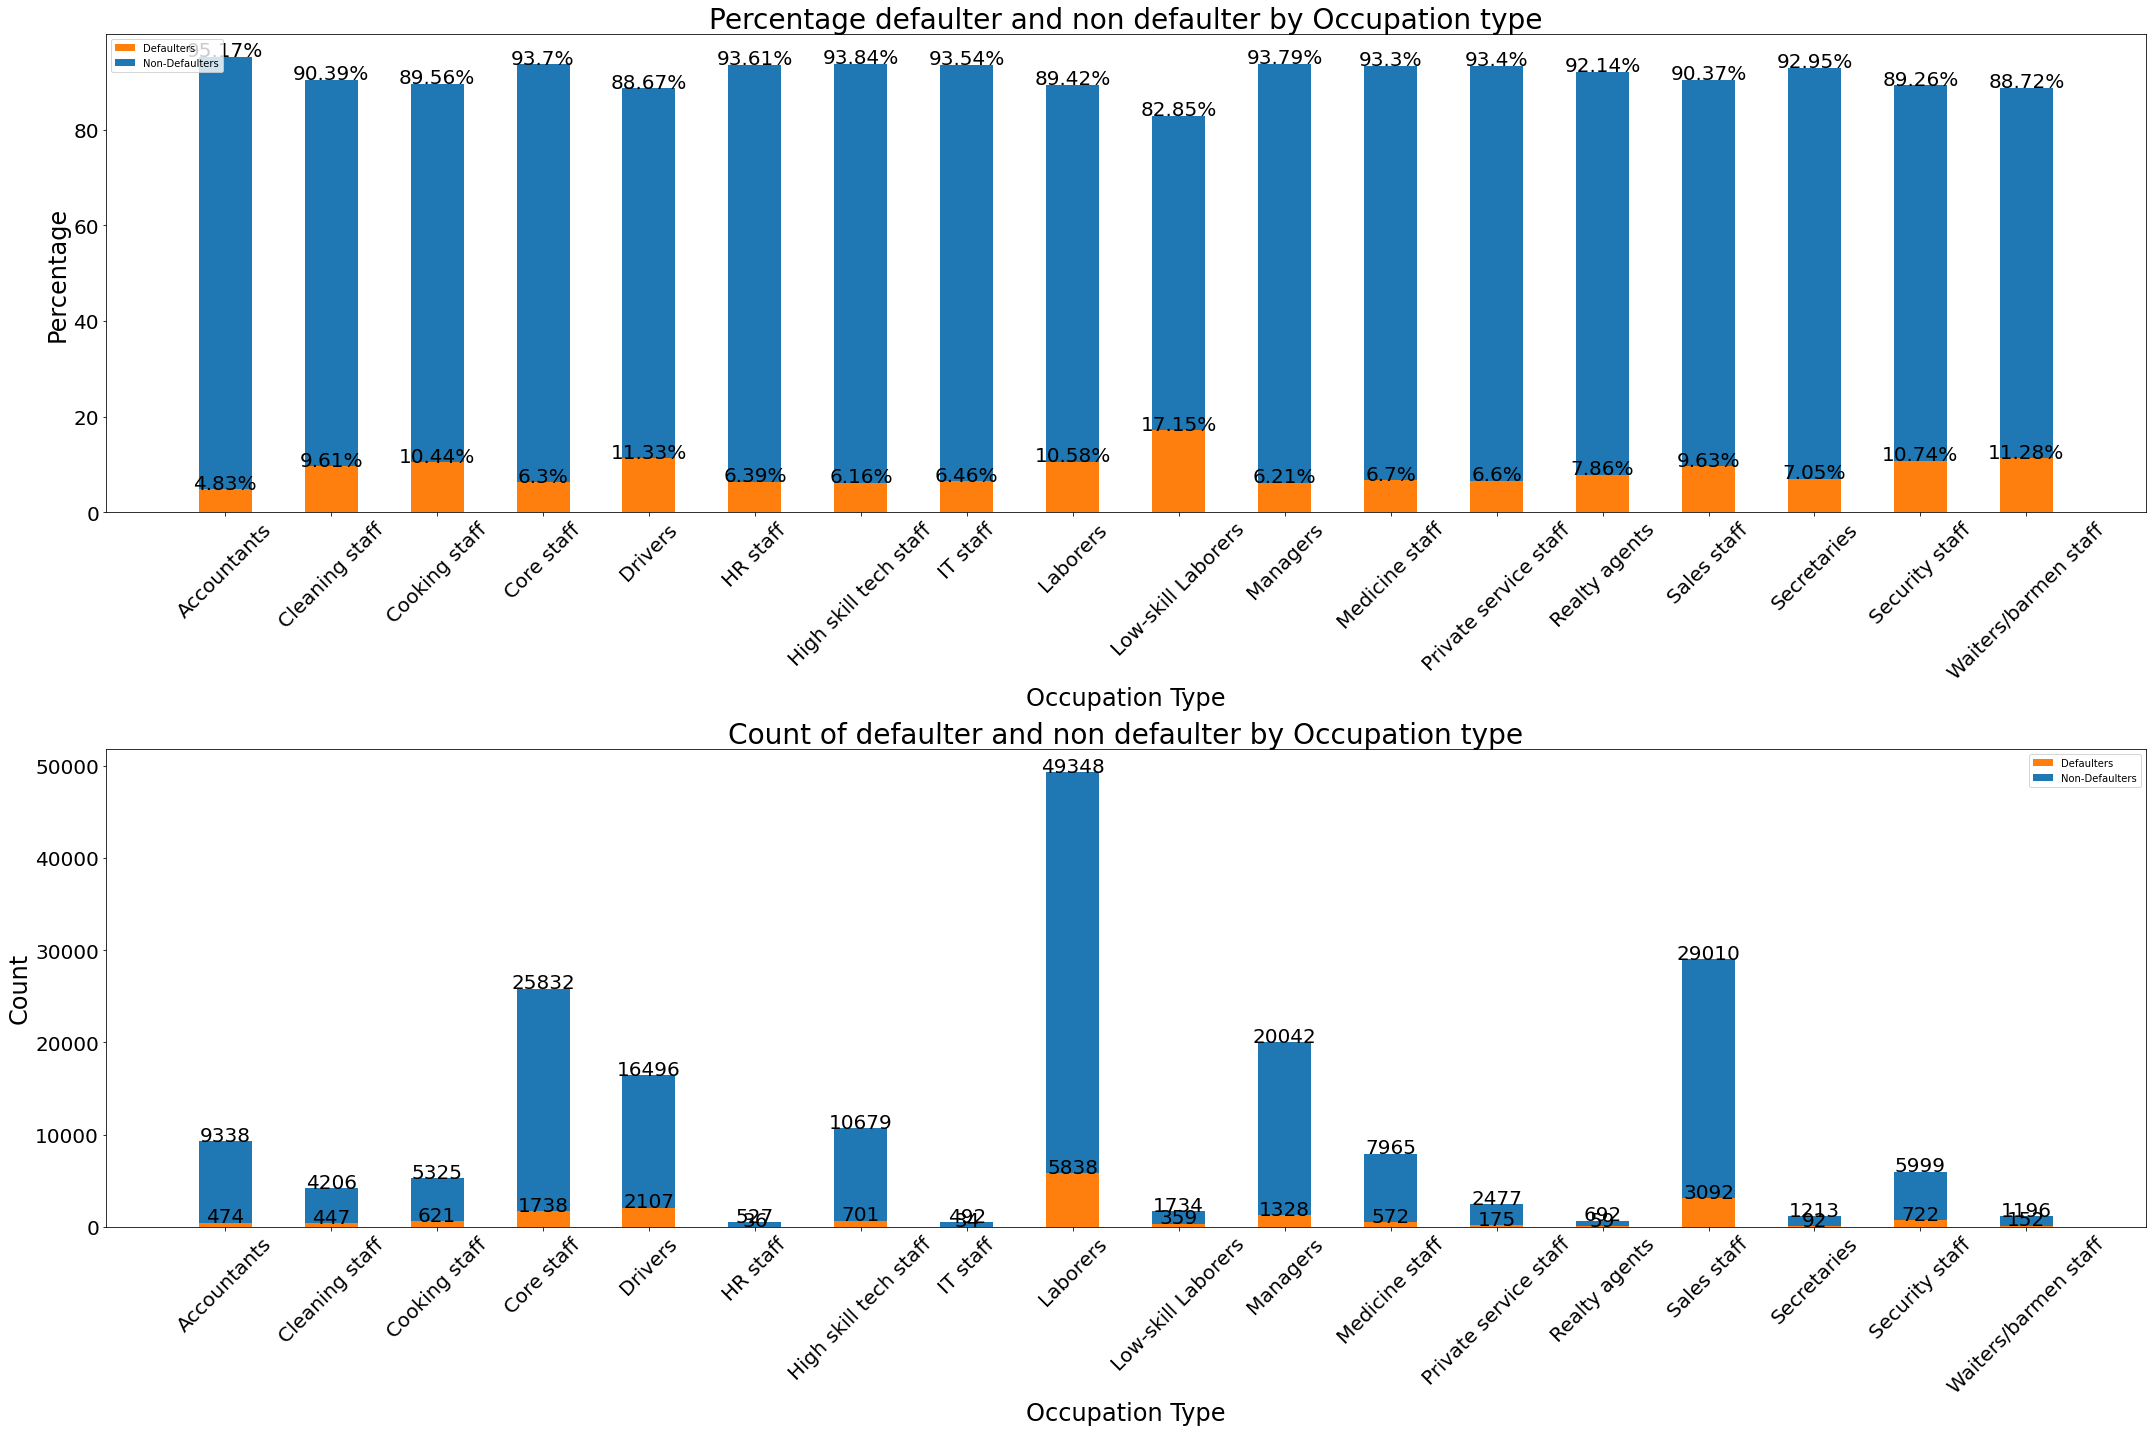

In [17]:
#stacked bar plots for understanding the impact of customer occupation type on Loan default status
fig, (ax1,ax2)=plt.subplots(2,1,figsize=(30,20))

#subplot 1 representing Percentage defaulter and non defaulter by customer occupation type
x,y='OCCUPATION_TYPE','TARGET'
df_q=df.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index()
g=ax1.bar(x=x,height='percent',data=df_q,width=0.5,color=['tab:orange','tab:blue'],label = 'Defaulters')
g=ax1.bar(x=x,height='percent',data=df_q,width=0.5,color=['tab:blue','tab:orange'],label = 'Non-Defaulters')
ax1.legend(loc='upper left')
for p in g:
    height=p.get_height().round(decimals=2)
    ax1.text(x=p.get_x()+p.get_width()/2,y=height+.10,
           s="{}%".format(height),
           ha='center',fontsize=20)
ax1.set_ylabel('Percentage',fontsize=24)
ax1.set_xlabel('Occupation Type',fontsize=24)
ax1.set_title('Percentage defaulter and non defaulter by Occupation type',fontsize=28)
ax1.tick_params(axis='x', labelsize=20, rotation=45)
ax1.tick_params(axis='y', labelsize=20)
x,y='OCCUPATION_TYPE','TARGET'
df_r=df.groupby(x)[y].value_counts().rename('count').reset_index()
col=['Non Defaulter','Defaulter']

#subplot 2 representing count of defaulter and non defaulter by customer occupation type
g=ax2.bar(x=x,height='count',width=0.5,data=df_r,color=['tab:orange','tab:blue'], label = 'Defaulters')
g=ax2.bar(x=x,height='count',width=0.5,data=df_r,color=['tab:blue','tab:orange'], label = 'Non-Defaulters')
ax2.legend(loc='upper right')
for p in g:
    height=p.get_height().round(decimals=2)
    ax2.text(x=p.get_x()+p.get_width()/2,y=height+.10,
           s="{}".format(height),
           ha='center',fontsize=20)
ax2.set_ylabel('Count',fontsize=24)
ax2.set_xlabel('Occupation Type',fontsize=24)
ax2.set_title('Count of defaulter and non defaulter by Occupation type',fontsize=28)
ax2.tick_params(axis='x', labelsize=20, rotation=45)
ax2.tick_params(axis='y', labelsize=20)
ax2.legend()
plt.tight_layout()
plt.show()

Laborers appy the most number of loans. The percentage defaulter is higher on the low-skill laborers which is 17.15%.Customers with occupation type accountants has the least percentage default loan which is 4.83%

### Percentage defaulter by housing type

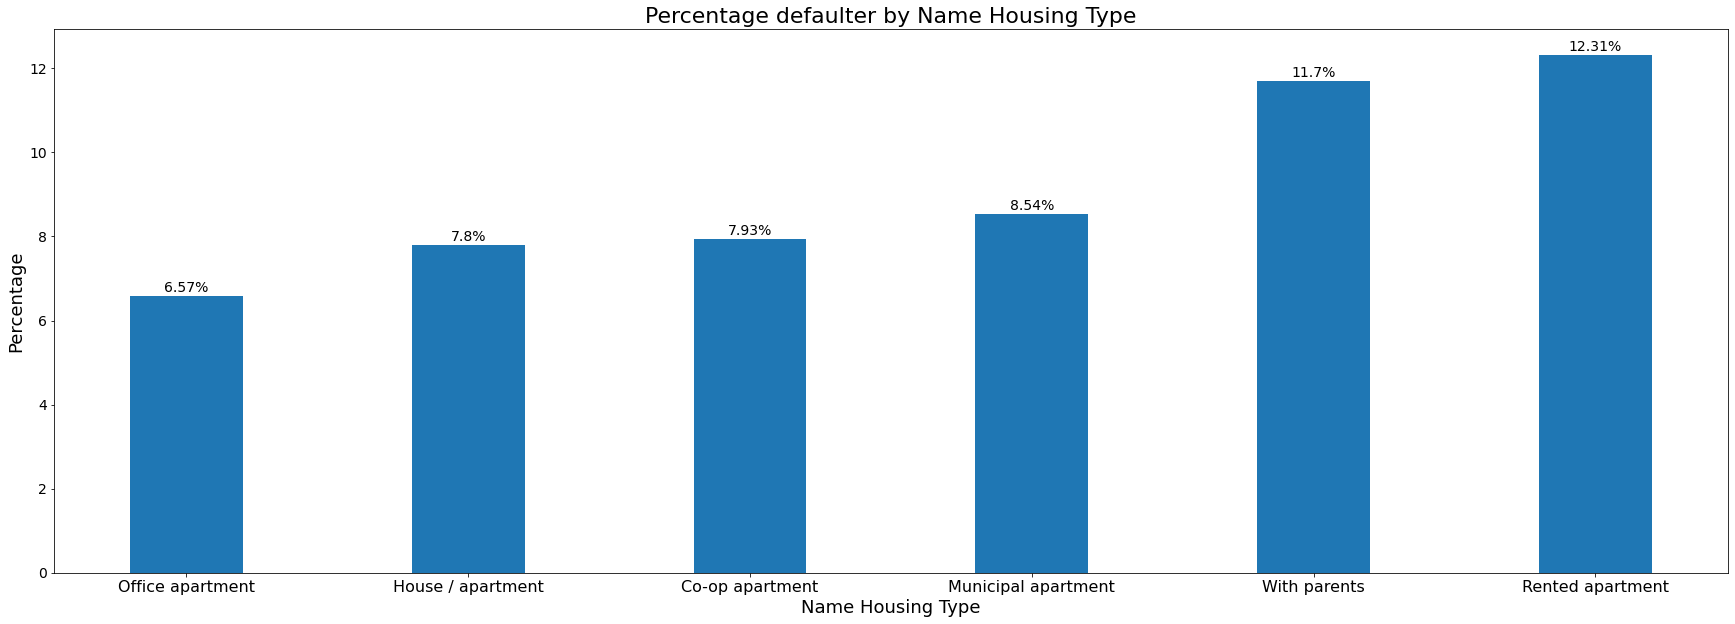

In [18]:
#bar plot depicting the loan defaulter percentage by housing types of the customers
plt.figure(figsize=(30,10))
x,y='NAME_HOUSING_TYPE','TARGET'
df_q=df.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index()
df_q1=df_q.loc[df_q['TARGET']==1]
df_sorted2 = df_q1.sort_values('percent')
df_sorted1=df_sorted2['percent'].round(decimals = 2)
g=plt.bar(x=x,height='percent',width=0.4,data=df_sorted2)
for p in g:
    height=p.get_height().round(decimals=2)
    plt.text(x=p.get_x()+p.get_width()/2,y=height+.10,
           s="{}%".format(height),
           ha='center',fontsize=14)
plt.xlabel("Name Housing Type",fontsize='18')
plt.ylabel("Percentage",fontsize='18')
plt.title('Percentage defaulter by Name Housing Type',fontsize='22')
plt.xticks(fontsize='16')
plt.yticks(fontsize='14')
plt.show()

From the Bivariate analysis we can observe that customers who lives in rented apartment are the most defaulters.

#### Percentage defaulter by contract type

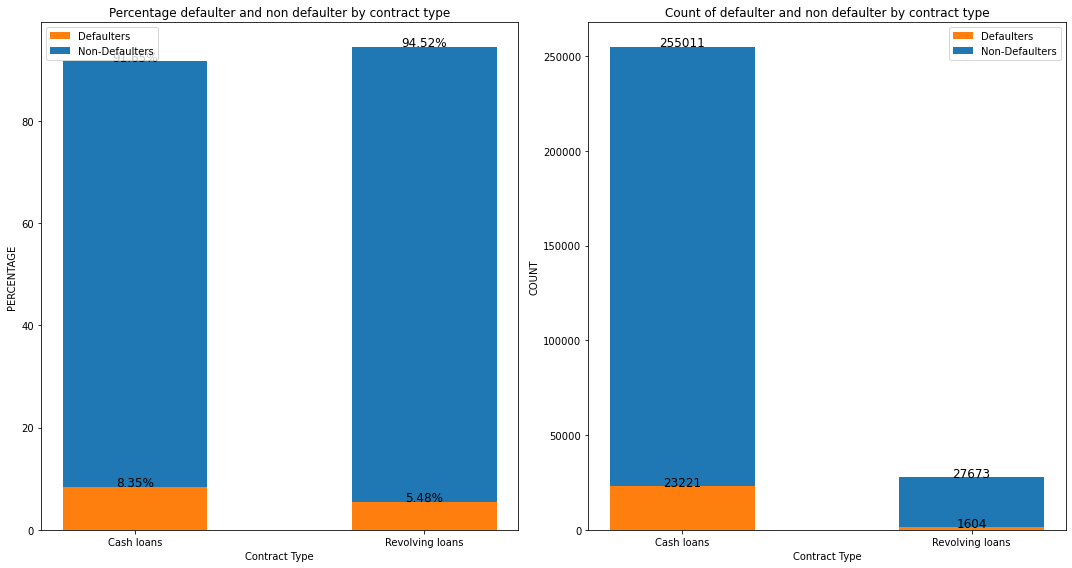

In [19]:
#stacked bar plots for understanding the impact of customer contract type on Loan default status
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,8))

#subplot 1 representing Percentage defaulter and non defaulter by customer contract type
x,y='NAME_CONTRACT_TYPE','TARGET'
df_q=df.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index()
g=ax1.bar(x=x,height='percent',data=df_q,width=0.5,color=['tab:orange','tab:blue'],label = 'Defaulters')
g=ax1.bar(x=x,height='percent',data=df_q,width=0.5,color=['tab:blue','tab:orange'],label = 'Non-Defaulters')
ax1.legend(loc='upper left')
for p in g:
    height=p.get_height().round(decimals=2)
    ax1.text(x=p.get_x()+p.get_width()/2,y=height+.10,
           s="{}%".format(height),
           ha='center',fontsize=12)
ax1.set_ylabel('PERCENTAGE')
ax1.set_xlabel('Contract Type')
ax1.set_title('Percentage defaulter and non defaulter by contract type')
x,y='NAME_CONTRACT_TYPE','TARGET'
df_r=df.groupby(x)[y].value_counts().rename('count').reset_index()
col=['Non Defaulter','Defaulter']

#subplot 2 representing count of defaulter and non defaulter by customer contract type
g=ax2.bar(x=x,height='count',width=0.5,data=df_r,color=['tab:orange','tab:blue'], label = 'Defaulters')
g=ax2.bar(x=x,height='count',width=0.5,data=df_r,color=['tab:blue','tab:orange'], label = 'Non-Defaulters')
ax2.legend(loc='upper right')
for p in g:
    height=p.get_height().round(decimals=2)
    ax2.text(x=p.get_x()+p.get_width()/2,y=height+.10,
           s="{}".format(height),
           ha='center',fontsize=12)
ax2.set_ylabel('COUNT')
ax2.set_xlabel('Contract Type')
ax2.set_title('Count of defaulter and non defaulter by contract type')
ax2.legend()
plt.tight_layout()
plt.show()

Most customers got the category cash loans in contract type.The percentage defaulters is also higher for cash loan contract type

## Analysis on Numerical Features

### Amount Goods price Vs Amount Credit 

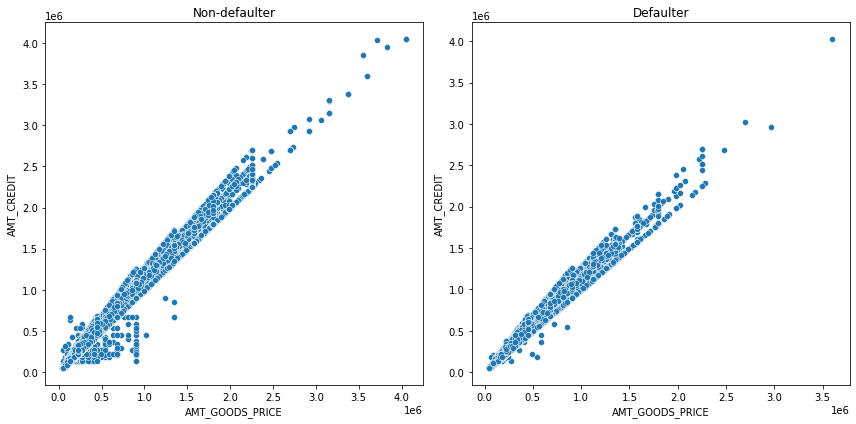

In [20]:
#scatter plots depicting the relationship between AMT_GOODS_PRICE and AMT_CREDIT in non defaulter and defaulter cases
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, title="Defaulter")

sns.scatterplot(df[df["TARGET"] == 0]['AMT_GOODS_PRICE'], df[df["TARGET"] == 0]['AMT_CREDIT'], ax=ax1)
sns.scatterplot(df[df["TARGET"] == 1]['AMT_GOODS_PRICE'], df[df["TARGET"] == 1]['AMT_CREDIT'], ax=ax2)

plt.tight_layout()
plt.show()

AMT_CREDIT and AMT_GOODS_PRICE has the linear relationship for both in Defaulter and Non-defaulter case. Also, plot shows the number of Defaulter is less at the lower range

### Days_Birth

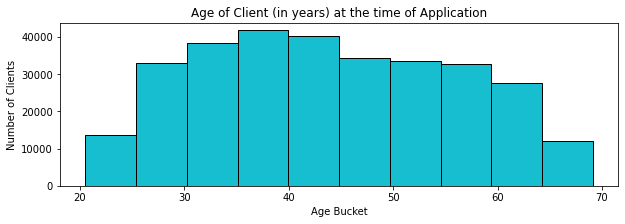

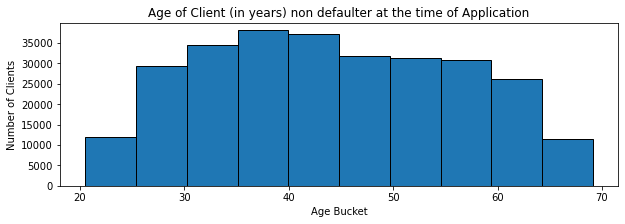

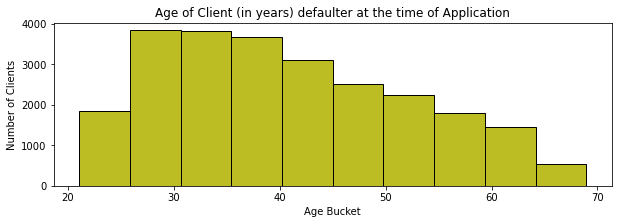

In [21]:
#Converting Negative days values to positive days
date_col = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']

for col in date_col:
    df[col] = abs(df[col])

#convert age from days to years
non_defaulter_days_birth = df[df['TARGET']==0]['DAYS_BIRTH'].values/365
defaulter_days_birth = df[df['TARGET']==1]['DAYS_BIRTH'].values/365

#plot histogram of age and number of clients at the time of application
plt.figure(figsize=(10,3))
plt.hist(df['DAYS_BIRTH'].values/365, bins=10, edgecolor='black', color='tab:cyan')
plt.title('Age of Client (in years) at the time of Application')
plt.xlabel('Age Bucket')
plt.ylabel('Number of Clients')
plt.show()

#plot histogram of age and number of non-defaulter clients at the time of application
plt.figure(figsize=(10,3))
plt.hist(non_defaulter_days_birth, bins=10, edgecolor='black', color='tab:blue')
plt.title('Age of Client (in years) non defaulter at the time of Application')
plt.xlabel('Age Bucket')
plt.ylabel('Number of Clients')
plt.show()

#plot histogram of age and number of defaulters at the time of application
plt.figure(figsize=(10,3))
plt.hist(defaulter_days_birth, bins=10, edgecolor='black', color='tab:olive')
plt.title('Age of Client (in years) defaulter at the time of Application')
plt.xlabel('Age Bucket')
plt.ylabel('Number of Clients')
plt.show()



- Most number of people applying for loans are in the range of (35-40) years followed by people in the range of (40-45) years 
- The number of applicants in people aged <25 or aged>65 is very low
- The people who are non defaulter of loan repayment are in the (35-40) years range
- The people who defaulter of loan repayment are in the (25-35) years range

### Days_Employed

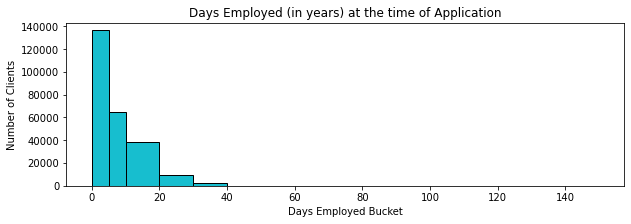

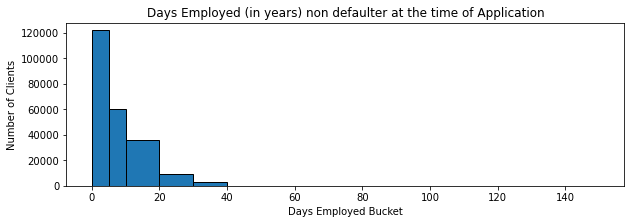

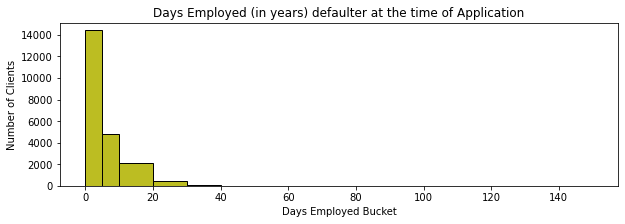

In [22]:
#convert work experience from days to years
non_defaulter_days_employed = df[df['TARGET']==0]['DAYS_EMPLOYED'].values/365
defaulter_days_employed = df[df['TARGET']==1]['DAYS_EMPLOYED'].values/365
bins = [0,5,10,20,30,40,50,60,150]
slot = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 above']

#plot histogram of work experience at the time of application
plt.figure(figsize=(10,3))
plt.hist(df['DAYS_EMPLOYED'].values/365, bins=bins, edgecolor='black', color='tab:cyan')
plt.title('Days Employed (in years) at the time of Application')
plt.xlabel('Days Employed Bucket')
plt.ylabel('Number of Clients')
#plt.xticks(loc=slot)
plt.show()

#plot histogram of work experience and number of non-defaulter clients at the time of application
plt.figure(figsize=(10,3))
plt.hist(non_defaulter_days_employed, bins=bins, edgecolor='black', color='tab:blue')
plt.title('Days Employed (in years) non defaulter at the time of Application')
plt.xlabel('Days Employed Bucket')
plt.ylabel('Number of Clients')
plt.show()

#plot histogram of work experience and number of defaulters at the time of application
plt.figure(figsize=(10,3))
plt.hist(defaulter_days_employed, bins=bins, edgecolor='black', color='tab:olive')
plt.title('Days Employed (in years) defaulter at the time of Application')
plt.xlabel('Days Employed Bucket')
plt.ylabel('Number of Clients')
plt.show()

In [23]:
#Creating bins for work experience
df['YEARS_EMPLOYED'] = df['DAYS_EMPLOYED'] // 365
bins = [0,5,10,20,30,40,50,60,150]
slots = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 above']

df['EMPLOYMENT_YEAR']=pd.cut(df['YEARS_EMPLOYED'],bins=bins,labels=slots)

In [24]:
#checking the binning of work experience and % of data in each category
df['EMPLOYMENT_YEAR'].value_counts(normalize=True)

0-5         0.555822
5-10        0.249666
10-20       0.145644
20-30       0.037501
30-40       0.010587
40-50       0.000780
50-60       0.000000
60 above    0.000000
Name: EMPLOYMENT_YEAR, dtype: float64

- More than 55% of the loan applicants have work experience within (0-5) years of work experience
- Also the non defaulters and defaulters are from the (0-5) years of work experience

In [25]:
df.drop('EMPLOYMENT_YEAR',axis=1,inplace=True)

### Checking for outliers

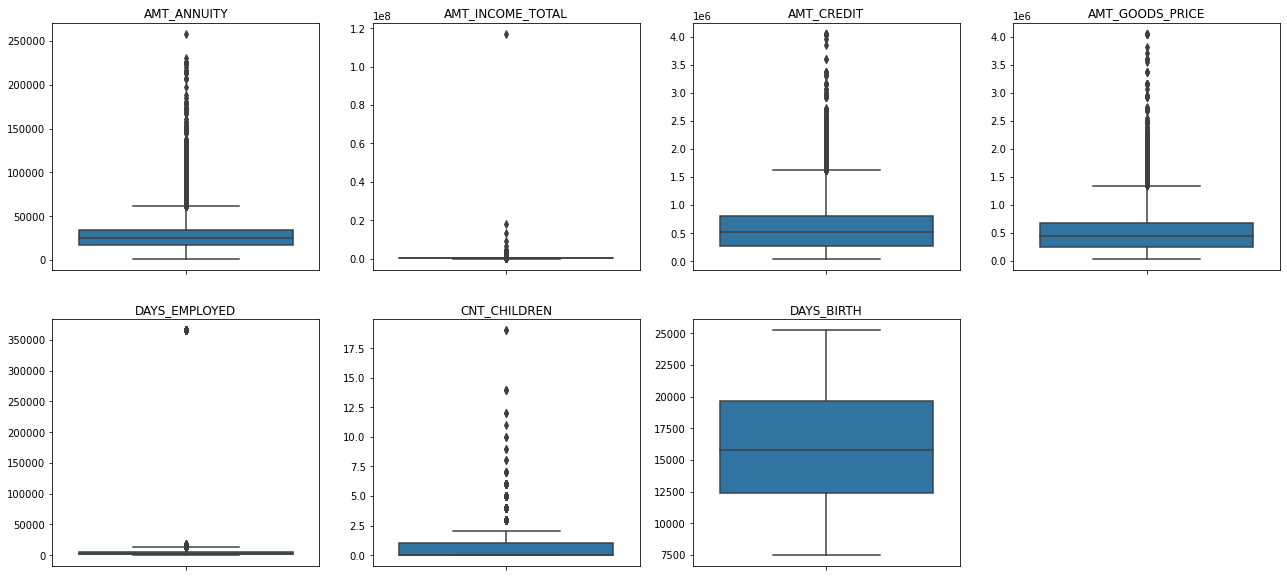

In [26]:
#plot box plots and see for outliers
plt.figure(figsize=(22,10))

app_outlier_col_1 = ['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_EMPLOYED']
app_outlier_col_2 = ['CNT_CHILDREN','DAYS_BIRTH']
for i in enumerate(app_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=df[i[1]])
    plt.title(i[1])
    plt.ylabel("")

for i in enumerate(app_outlier_col_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=df[i[1]])
    plt.title(i[1])
    plt.ylabel("")

It can be seen that in current application data
- AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE,CNT_CHILDREN have some number of outliers.
- AMT_INCOME_TOTAL has huge number of outliers which indicate that few of the loan applicants have high income when compared to the others.
- DAYS_BIRTH has no outliers which means the data available is reliable.
- DAYS_EMPLOYED has outlier values around 350000(days) which is around 958 years which is impossible and hence this has to be incorrect entry.

In [27]:
#check the DAYS_EMPLOYED for outlier data
df['DAYS_EMPLOYED'].value_counts()

365243    55374
200         156
224         152
230         151
199         151
212         150
384         143
229         143
231         140
215         138
207         138
216         137
188         137
196         136
116         136
222         135
193         134
195         133
214         132
254         131
213         131
201         130
381         130
233         128
185         128
194         127
237         127
184         126
234         126
209         125
348         125
241         124
745         123
137         123
382         122
139         122
198         122
238         122
218         120
240         120
205         120
191         120
118         119
223         119
225         119
181         118
430         118
244         118
227         118
268         117
370         117
133         117
132         117
228         117
115         117
119         116
204         116
129         116
109         115
391         115
236         115
206         115
208     

### Drop the outliers

In [28]:
#drop the outliers
df.drop(df.index[df['DAYS_EMPLOYED'] == 365243], inplace = True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252135 entries, 0 to 307510
Columns: 123 entries, SK_ID_CURR to YEARS_EMPLOYED
dtypes: float64(65), int64(42), object(16)
memory usage: 238.5+ MB


## Data Preprocessing

In [30]:
#Identify highly correlated features
import warnings
warnings.filterwarnings("ignore")
#Create correlation matrix
cor_matrix = df.corr().abs()
#Select upper triangle of correlation matrix
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
#Find index of feature columns with correlation greater than 0.7
corr_features= [column for column in upper_tri.columns if any(upper_tri[column] > 0.7)]
print('The highly correlated features are:',corr_features)

The highly correlated features are: ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT_W_CITY', 'LIVE_REGION_NOT_WORK_REGION', 'LIVE_CITY_NOT_WORK_CITY', 'ELEVATORS_AVG', 'FLOORSMIN_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'YEARS_EMPLOYED']


#### Dropping Correlated Features

In [31]:
#dropping highly correlated features
df.drop( ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'FLAG_EMP_PHONE', 'CNT_FAM_MEMBERS', 
          'REGION_RATING_CLIENT_W_CITY', 'LIVE_REGION_NOT_WORK_REGION', 'LIVE_CITY_NOT_WORK_CITY', 
          'ELEVATORS_AVG', 'FLOORSMIN_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'APARTMENTS_MODE', 
          'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 
          'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 
          'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 
          'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
          'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 
          'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 
          'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'],axis=1,inplace=True)

### Dropping Redundant Features

In [32]:
#dropping the redundant featues of dataset
df.drop(['FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21'],axis=1,inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252135 entries, 0 to 307510
Data columns (total 61 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   252135 non-null  int64  
 1   TARGET                       252135 non-null  int64  
 2   NAME_CONTRACT_TYPE           252135 non-null  object 
 3   CODE_GENDER                  252135 non-null  object 
 4   FLAG_OWN_CAR                 252135 non-null  object 
 5   FLAG_OWN_REALTY              252135 non-null  object 
 6   CNT_CHILDREN                 252135 non-null  int64  
 7   AMT_INCOME_TOTAL             252135 non-null  float64
 8   AMT_CREDIT                   252135 non-null  float64
 9   NAME_TYPE_SUITE              251041 non-null  object 
 10  NAME_INCOME_TYPE             252135 non-null  object 
 11  NAME_EDUCATION_TYPE          252135 non-null  object 
 12  NAME_FAMILY_STATUS           252135 non-null  object 
 13 

### Imputing Missing Values for Numerical Features

In [34]:
#creating an index of all numerical features
dfc_cols = df.columns[(df.dtypes == 'float64') & (df.columns!= 'TARGET')]
dfc_cols

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE',
       'DAYS_REGISTRATION', 'OWN_CAR_AGE', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'LANDAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [35]:
#create dataframe of all numerical features
dfc_cols=df[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE',
       'DAYS_REGISTRATION', 'OWN_CAR_AGE', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'LANDAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR']]

array([[<AxesSubplot:title={'center':'AMT_INCOME_TOTAL'}>,
        <AxesSubplot:title={'center':'AMT_CREDIT'}>,
        <AxesSubplot:title={'center':'REGION_POPULATION_RELATIVE'}>,
        <AxesSubplot:title={'center':'DAYS_REGISTRATION'}>,
        <AxesSubplot:title={'center':'OWN_CAR_AGE'}>],
       [<AxesSubplot:title={'center':'EXT_SOURCE_1'}>,
        <AxesSubplot:title={'center':'EXT_SOURCE_2'}>,
        <AxesSubplot:title={'center':'EXT_SOURCE_3'}>,
        <AxesSubplot:title={'center':'APARTMENTS_AVG'}>,
        <AxesSubplot:title={'center':'BASEMENTAREA_AVG'}>],
       [<AxesSubplot:title={'center':'YEARS_BEGINEXPLUATATION_AVG'}>,
        <AxesSubplot:title={'center':'YEARS_BUILD_AVG'}>,
        <AxesSubplot:title={'center':'COMMONAREA_AVG'}>,
        <AxesSubplot:title={'center':'ENTRANCES_AVG'}>,
        <AxesSubplot:title={'center':'FLOORSMAX_AVG'}>],
       [<AxesSubplot:title={'center':'LANDAREA_AVG'}>,
        <AxesSubplot:title={'center':'NONLIVINGAPARTMENTS_AVG'}>,
   

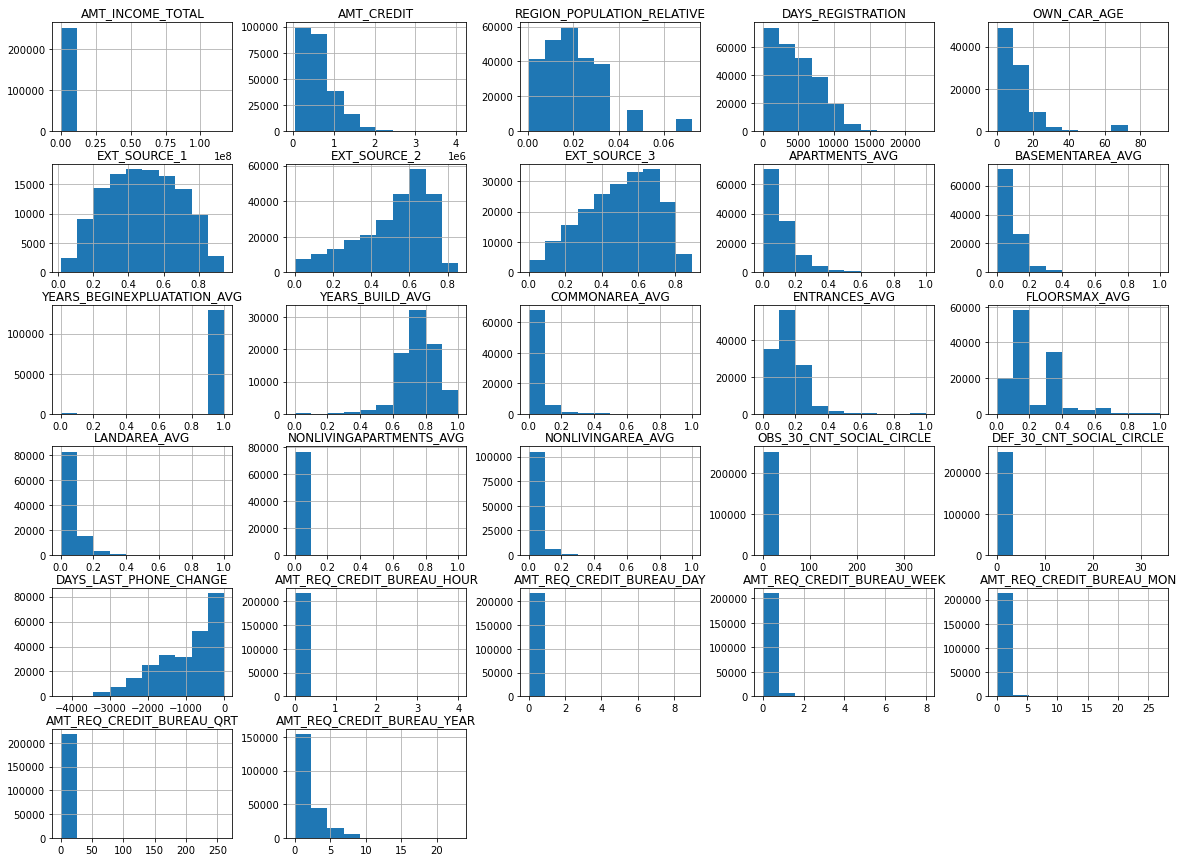

In [36]:
#plot histograms to understand the skewness of numerical features
import matplotlib.pyplot as plt
%matplotlib inline
dfc_cols.hist(figsize = (20, 15))

Since all the numerical features are skewed either to the left or right so we can impute the missing values with median

#### Imputing Median For Missing Numerical Features

In [37]:
#Imputing the median for missing values of numerical features
cols=['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE',
       'DAYS_REGISTRATION', 'OWN_CAR_AGE', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'LANDAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR']
df[cols]=df[cols].fillna(df.median().iloc[0])

### Imputing Mode for Categorical Features

In [38]:
#Imputing the mode for missing values of categorical features
col=['NAME_TYPE_SUITE','OCCUPATION_TYPE','FONDKAPREMONT_MODE','HOUSETYPE_MODE','WALLSMATERIAL_MODE',
    'EMERGENCYSTATE_MODE']
df[col]=df[col].fillna(df.mode().iloc[0])

In [39]:
df.isna().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
OWN_CAR_AGE                    0
FLAG_MOBIL                     0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
REGION_RATING_CLIENT           0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION

#### Mapping the Categorical Features

In [40]:
df.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
OWN_CAR_AGE                    float64
FLAG_MOBIL                       int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE                       int64
FLAG_EMAIL                       int64
OCCUPATION_TYPE          

### Mapping Categorical Features

In [41]:
#create an index of categorical features
df_cols = df.columns[(df.dtypes == 'object') & (df.columns!= 'TARGET')]
df_cols

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [42]:
#transforming categorical values into numerical format for model building

In [43]:
df['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         226224
Revolving loans     25911
Name: NAME_CONTRACT_TYPE, dtype: int64

In [44]:
scale_n = {'Cash loans':0, 
            'Revolving loans':1,
          }
df['NAME_CONTRACT_TYPE'] = df['NAME_CONTRACT_TYPE'].replace(scale_n)
df['NAME_CONTRACT_TYPE']=df['NAME_CONTRACT_TYPE'].astype(int)

In [45]:
df['CODE_GENDER'].value_counts()

F    157180
M     94955
Name: CODE_GENDER, dtype: int64

In [46]:
scale_g = {'F':0, 
            'M':1,
          }
df['CODE_GENDER'] = df['CODE_GENDER'].replace(scale_g)
df['CODE_GENDER']=df['CODE_GENDER'].astype(int)

In [47]:
df['FLAG_OWN_CAR'].value_counts()

N    157717
Y     94418
Name: FLAG_OWN_CAR, dtype: int64

In [48]:
scale_c = {'N':0, 
            'Y':1,
          }
df['FLAG_OWN_CAR'] = df['FLAG_OWN_CAR'].replace(scale_c)
df['FLAG_OWN_CAR']=df['FLAG_OWN_CAR'].astype(int)

In [49]:
scale_r = {'Y':0, 
            'N':1,
          }
df['FLAG_OWN_REALTY'] = df['FLAG_OWN_REALTY'].replace(scale_r)
df['FLAG_OWN_REALTY']=df['FLAG_OWN_REALTY'].astype(int)

In [50]:
df.drop(['HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE','FONDKAPREMONT_MODE',
         'WEEKDAY_APPR_PROCESS_START'],axis=1,inplace=True)

In [51]:
df['ORGANIZATION_TYPE'].replace('XNA','Business Entity Type 3',inplace=True)

#### ONe hot encoding

In [52]:
#One hot encoding on multiple categorical columns using get_dummies()
cols=pd.get_dummies(df,columns=['NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
                                'NAME_HOUSING_TYPE','OCCUPATION_TYPE',
                                'ORGANIZATION_TYPE'],
                    prefix=['NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
                                'NAME_HOUSING_TYPE','OCCUPATION_TYPE',
                                'ORGANIZATION_TYPE'])
df[cols.columns]=cols
df.drop(['NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
                                'NAME_HOUSING_TYPE','OCCUPATION_TYPE',
                                'ORGANIZATION_TYPE'],axis=1,inplace=True)

In [53]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_EMPLOYED,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,OR

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252135 entries, 0 to 307510
Columns: 154 entries, SK_ID_CURR to ORGANIZATION_TYPE_University
dtypes: float64(27), int64(22), uint8(105)
memory usage: 121.4 MB


In [55]:
data=df.copy()

### Standardization and Train/Test Split

In [56]:
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
X=df.drop('TARGET',axis=1)
Y=df['TARGET']
#split into train and test datasets.
X_train_org,X_test_org,Y_train,Y_test=train_test_split(X,Y,train_size=0.70, random_state=0)
#normalize dataset using MinMaxScaler()
scaler=MinMaxScaler()
#apply the scale to fit and transform test and train sets
X_train=pd.DataFrame(scaler.fit_transform(X_train_org),columns=X_train_org.columns)
X_test=pd.DataFrame(scaler.transform(X_test_org),columns=X_test_org.columns)

## Model Building

### Model1:Logistic Regression

In [57]:
#Build Logistic Regression model on dataset
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
#instantiate the logistic regression model
log_reg = LogisticRegression(C =0.01, max_iter = 100, penalty = 'l2', solver = 'newton-cg',random_state=0)
# fit the logistic regression model with data 
log_reg.fit(X_train, Y_train)
#predict the features of dataset
pred_prob_log_reg_train= log_reg.predict_proba(X_train)
pred_prob_log_reg_test= log_reg.predict_proba(X_test)
#calculate the scores
roc_auc_score_log_reg_train = roc_auc_score(Y_train, pred_prob_log_reg_train[:,1])
roc_auc_score_log_reg_test = roc_auc_score(Y_test, pred_prob_log_reg_test[:,1])
print("Logistic Regression Train ROC_AUC Score: {:.3f}".format(roc_auc_score_log_reg_train))
print("Logistic Regression Test ROC_AUC Score: {:.3f}".format(roc_auc_score_log_reg_test))

Logistic Regression Train ROC_AUC Score: 0.674
Logistic Regression Test ROC_AUC Score: 0.673


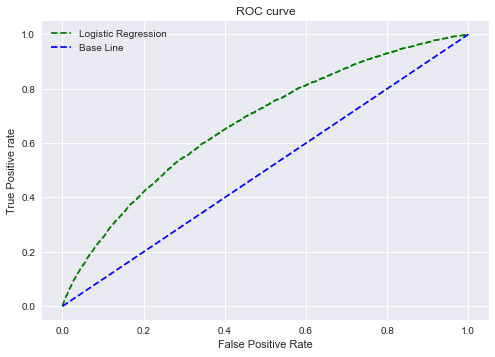

In [58]:
from sklearn.metrics import roc_curve
fpr, tpr, thresh = roc_curve(Y_test, pred_prob_log_reg_test[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='green', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue',label='Base Line')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

### Model2- Decision Tree Classifier

In [59]:
#Build Decision tree model on dataset
from sklearn.tree import DecisionTreeClassifier
#instantiate the logistic regression model
dtree = DecisionTreeClassifier(max_depth = 4,random_state=0)
#fit the decision tree model with data 
dtree.fit(X_train, Y_train)
#predict the features of dataset
pred_prob_dtree_train = dtree.predict_proba(X_train)
pred_prob_dtree_test = dtree.predict_proba(X_test)
#calculate the scores
dtree_best_train_score = roc_auc_score(Y_train, pred_prob_dtree_train[:,1])
dtree_best_test_score = roc_auc_score(Y_test, pred_prob_dtree_test[:,1])
print("Decision Tree Train ROC_AUC Score: {:.3f}".format(dtree_best_train_score))
print("Decision Tree Test ROC_AUC Score: {:.3f}".format(dtree_best_test_score))

Decision Tree Train ROC_AUC Score: 0.631
Decision Tree Test ROC_AUC Score: 0.621


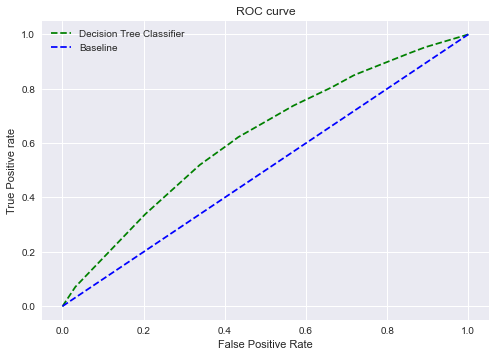

In [60]:
fpr_dtree, tpr_dtree, thresh_dtree = roc_curve(Y_test, pred_prob_dtree_test[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr_dtree, tpr_dtree, linestyle='--',color='green', label= "Decision Tree Classifier")
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue',label='Baseline')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

### Model3: Random Forest Classifier

In [61]:
#Build the Random Forest Clarifier model
from sklearn.ensemble import RandomForestClassifier
#instantiate the Random Forest model
rnd_clf =  RandomForestClassifier(n_jobs=-1,n_estimators=100,max_depth=6,max_leaf_nodes=7,
                                  max_features=0.1,max_samples=0.1,random_state=0)
#fit the Random Forest model with data 
rnd_clf.fit(X_train, Y_train)

#predict the features of dataset
rnd_predprob_train = rnd_clf.predict_proba(X_train)
rnd_predprob_test = rnd_clf.predict_proba(X_test)

#calculate the scores
print("Random Classifier Train Score: {:.3f}" .format(roc_auc_score(Y_train, rnd_predprob_train[:,1])))
print("Random Classifie Test Score: {:.3f}" .format(roc_auc_score(Y_test, rnd_predprob_test[:,1])))

Random Classifier Train Score: 0.656
Random Classifie Test Score: 0.651


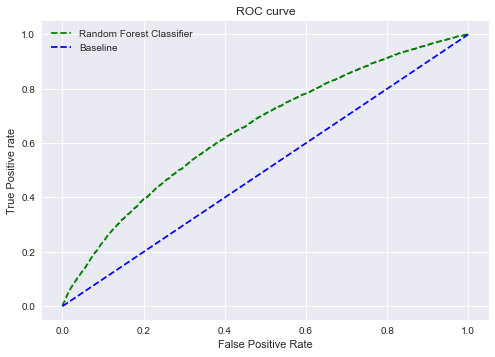

In [62]:
fpr_dtree, tpr_dtree, thresh_dtree = roc_curve(Y_test, rnd_predprob_test[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr_dtree, tpr_dtree, linestyle='--',color='green', label= "Random Forest Classifier")
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue',label='Baseline')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

### Model4:XGBoost Classifier

In [63]:
#Build the XGBoost Clarifier model
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(n_estimators=60,max_depth = 4,gamma=5,min_child_weight=40,random_state=0)
#fit the XGBoost model with data 
xgb_clf.fit(X_train, Y_train)
#predict the features of dataset
pred_prob_xgb_train = xgb_clf.predict_proba(X_train)
pred_prob_xgb_test = xgb_clf.predict_proba(X_test)
xgb_best_train_score = roc_auc_score(Y_train, pred_prob_xgb_train[:,1])
xgb_best_test_score = roc_auc_score(Y_test, pred_prob_xgb_test[:,1])
#calculate the scores
print("XGBoost Train ROC_AUC Score: {:.3f}".format(xgb_best_train_score))
print("XGBoost Tree Test ROC_AUC Score: {:.3f}".format(xgb_best_test_score))

XGBoost Train ROC_AUC Score: 0.774
XGBoost Tree Test ROC_AUC Score: 0.753


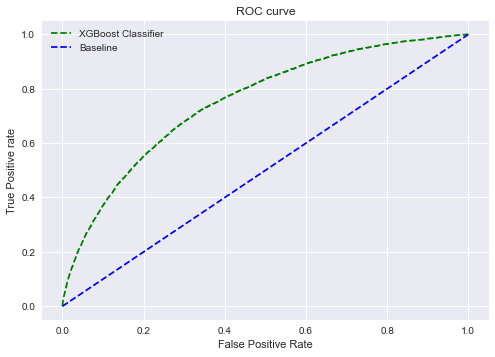

In [64]:
fpr_dtree, tpr_dtree, thresh_dtree = roc_curve(Y_test, pred_prob_xgb_test[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr_dtree, tpr_dtree, linestyle='--',color='green', label= "XGBoost Classifier")
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue',label='Baseline')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

### Model Evaluation

In [65]:
#Evaluating the performance of all the above models and display the scores
models = ['Logistic Regression', 'Decision Tree Classifier', 
          'Random Forest Classifier','XGBoost Classifier']

In [66]:
model_results = pd.DataFrame(np.array([[roc_auc_score_log_reg_train, roc_auc_score_log_reg_test],
                             [dtree_best_train_score, dtree_best_test_score],
                             [roc_auc_score(Y_train, rnd_predprob_train[:,1]), roc_auc_score(Y_test, rnd_predprob_test[:,1])],
                                      [xgb_best_train_score,xgb_best_test_score]]),
                   columns=['Train_Score','Test_Score'], index=[i for i in models])

In [67]:
model_results['Train_Score'] = round(model_results['Train_Score'],4)
model_results['Test_Score'] = round(model_results['Test_Score'],4)

In [68]:
model_results['Difference'] = round(model_results['Train_Score']-model_results['Test_Score'],4)

In [69]:
model_results

,Train_Score,Test_Score,Difference
Logistic Regression,0.6739,0.6734,0.0005
Decision Tree Classifier,0.6310,0.6209,0.0101
Random Forest Classifier,0.6564,0.6507,0.0057
XGBoost Classifier,0.7738,0.7534,0.0204


### Result:
- From the above table, XGBoost Classifier is a good fit model with higher roc_auc score.

## Feature Selection

In [70]:
#display the feature importance scores
feature_scores = pd.Series(xgb_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

EXT_SOURCE_2                                         0.085396
NAME_EDUCATION_TYPE_Higher education                 0.058390
EXT_SOURCE_3                                         0.051762
AMT_REQ_CREDIT_BUREAU_YEAR                           0.036278
CODE_GENDER                                          0.034727
NAME_CONTRACT_TYPE                                   0.032163
OWN_CAR_AGE                                          0.026104
DAYS_EMPLOYED                                        0.025842
EXT_SOURCE_1                                         0.025117
NAME_EDUCATION_TYPE_Secondary / secondary special    0.022600
NAME_FAMILY_STATUS_Married                           0.019181
DEF_30_CNT_SOCIAL_CIRCLE                             0.018872
NAME_INCOME_TYPE_Working                             0.017993
REGION_RATING_CLIENT                                 0.017256
AMT_CREDIT                                           0.016696
OCCUPATION_TYPE_Core staff                           0.016591
DAYS_BIR

In [71]:
f_ser = feature_scores.to_frame(name='coeff')
f_ser

,coeff
EXT_SOURCE_2,0.085396
NAME_EDUCATION_TYPE_Higher education,0.058390
EXT_SOURCE_3,0.051762
AMT_REQ_CREDIT_BUREAU_YEAR,0.036278
CODE_GENDER,0.034727
NAME_CONTRACT_TYPE,0.032163
OWN_CAR_AGE,0.026104
DAYS_EMPLOYED,0.025842
EXT_SOURCE_1,0.025117
NAME_EDUCATION_TYPE_Secondary / secondary special,0.022600


In [72]:
#dropping the features with 0 importance score
f_ser.drop(f_ser.index[f_ser['coeff'] == 0], inplace = True)

In [79]:
f_ser.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75 entries, EXT_SOURCE_2 to NONLIVINGAPARTMENTS_AVG
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   coeff   75 non-null     float32
dtypes: float32(1)
memory usage: 2.9+ KB


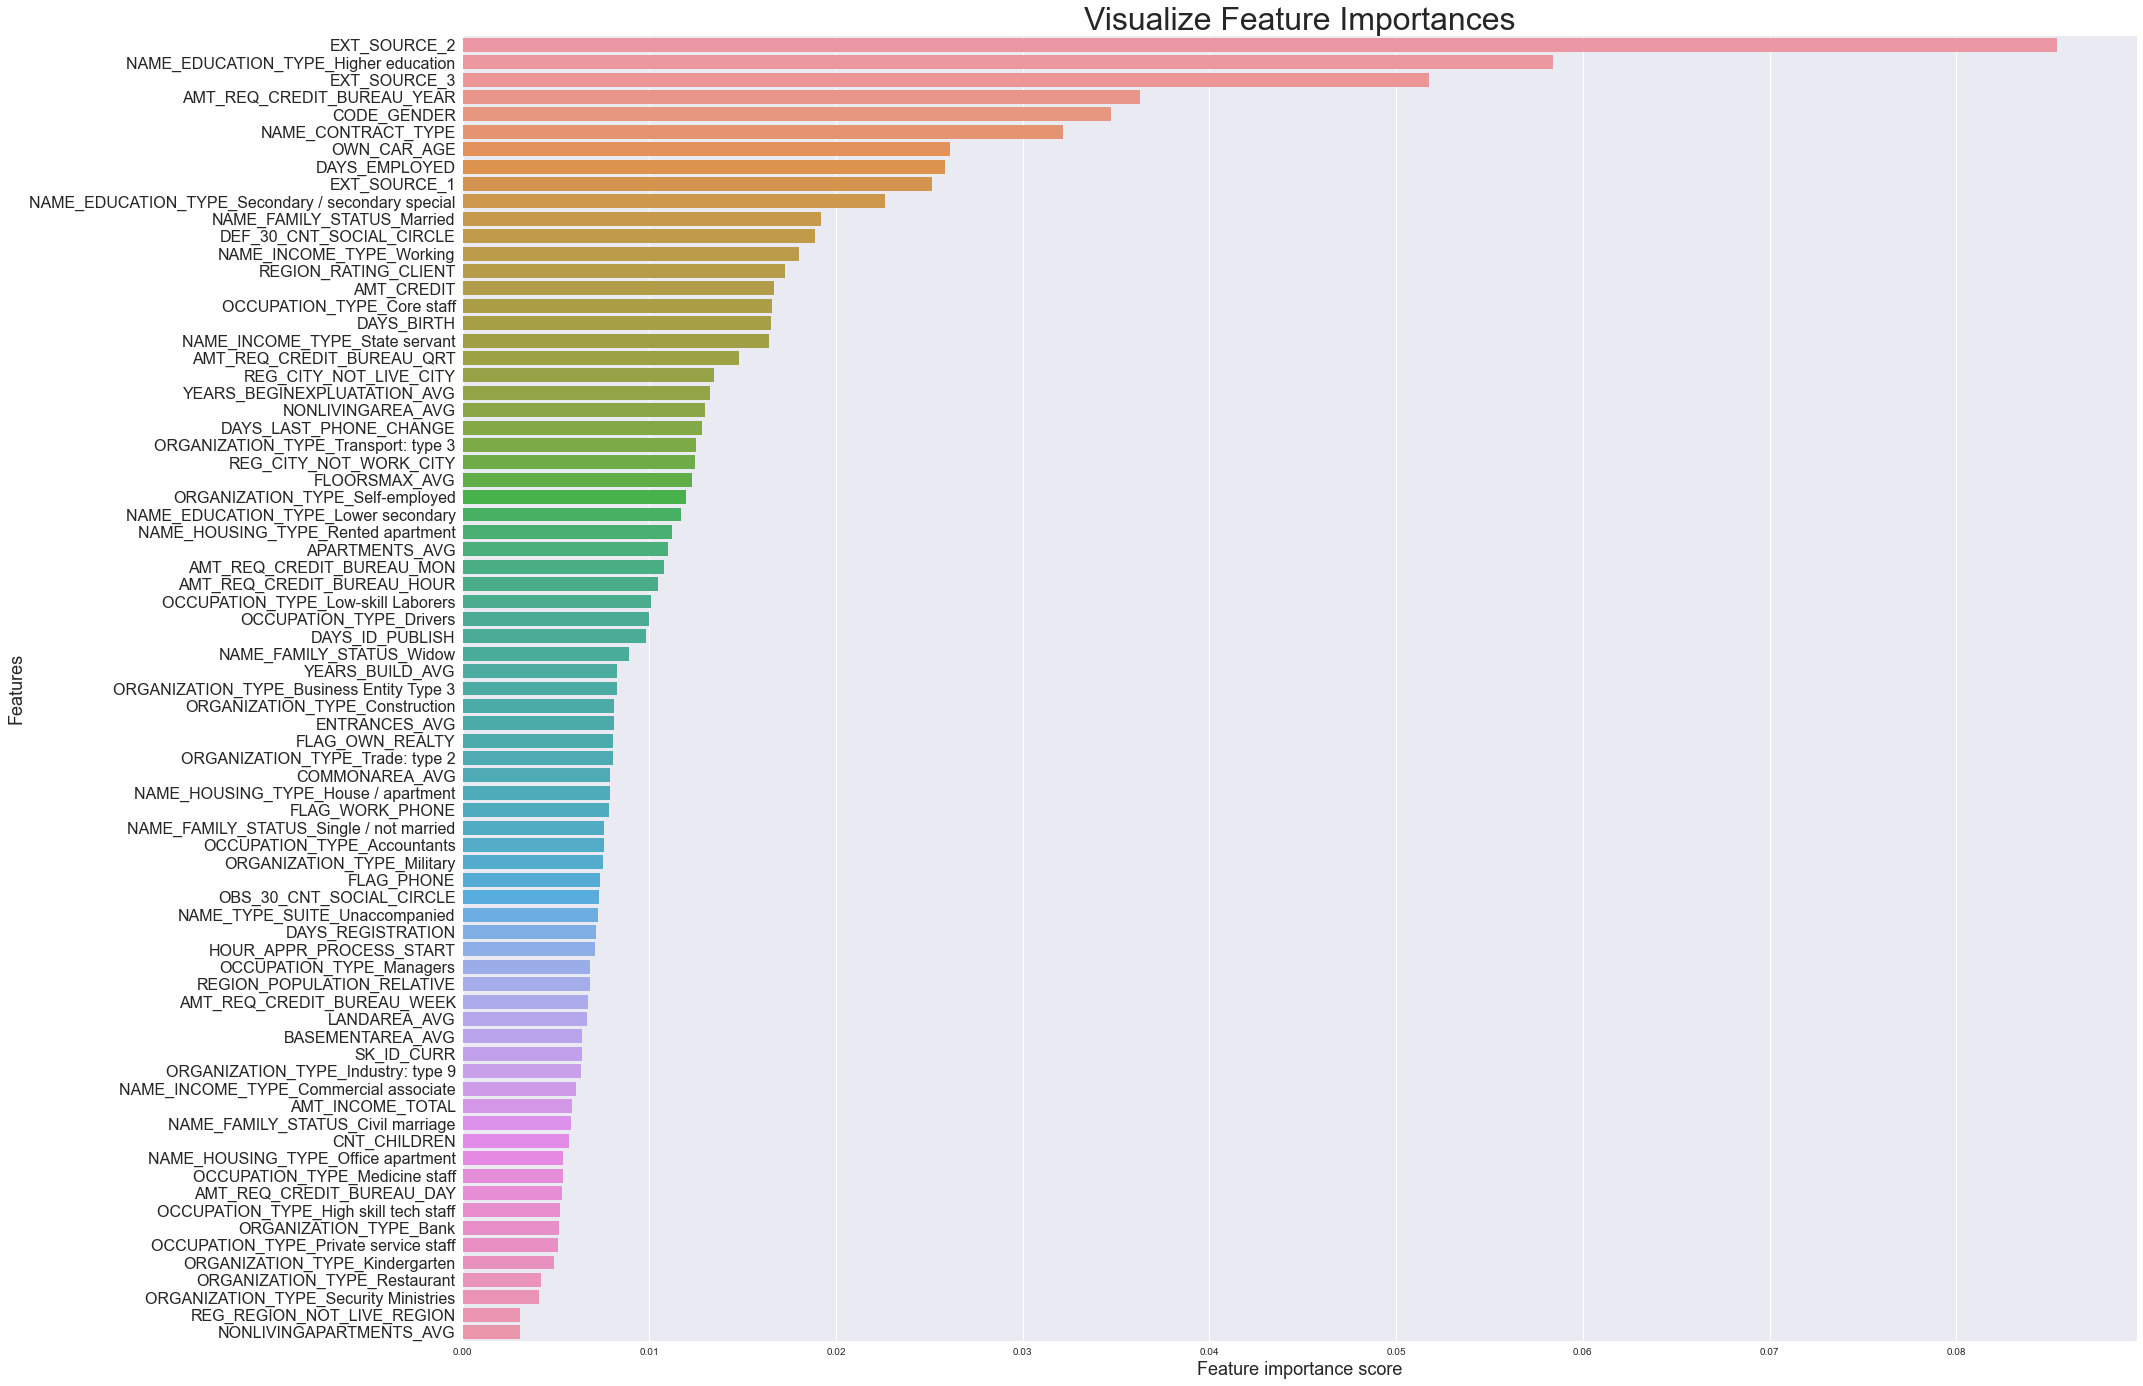

In [73]:
#plot the bar graph to viuslaize top features based on feature importance scores
fig, ax = plt.subplots(figsize=(30, 24))
f_ser['coeff'].round(decimals = 2)
ax = sns.barplot(x='coeff', y=f_ser.index, data=f_ser)
ax.set_title("Visualize Feature Importances",fontsize=32)
ax.set_yticklabels(f_ser.index,fontsize=16)
ax.set_xlabel("Feature importance score",fontsize=18)
ax.set_ylabel("Features",fontsize=18)
plt.show()

### Model Optimization

In [74]:
f_new=f_ser.reset_index().rename(columns={'index': 'Features'})

In [75]:
f_new['Features'].unique()

array(['EXT_SOURCE_2', 'NAME_EDUCATION_TYPE_Higher education',
       'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'CODE_GENDER',
       'NAME_CONTRACT_TYPE', 'OWN_CAR_AGE', 'DAYS_EMPLOYED',
       'EXT_SOURCE_1',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_FAMILY_STATUS_Married', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'NAME_INCOME_TYPE_Working', 'REGION_RATING_CLIENT', 'AMT_CREDIT',
       'OCCUPATION_TYPE_Core staff', 'DAYS_BIRTH',
       'NAME_INCOME_TYPE_State servant', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'REG_CITY_NOT_LIVE_CITY', 'YEARS_BEGINEXPLUATATION_AVG',
       'NONLIVINGAREA_AVG', 'DAYS_LAST_PHONE_CHANGE',
       'ORGANIZATION_TYPE_Transport: type 3', 'REG_CITY_NOT_WORK_CITY',
       'FLOORSMAX_AVG', 'ORGANIZATION_TYPE_Self-employed',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_HOUSING_TYPE_Rented apartment', 'APARTMENTS_AVG',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'OCCUPATION_TYPE_Low-skill Laborers

In [76]:
#Split the feature important dataset into train and test datasets 
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
x=data[['EXT_SOURCE_2', 'NAME_EDUCATION_TYPE_Higher education',
       'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'CODE_GENDER',
       'NAME_CONTRACT_TYPE', 'OWN_CAR_AGE', 'DAYS_EMPLOYED',
       'EXT_SOURCE_1',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_FAMILY_STATUS_Married', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'NAME_INCOME_TYPE_Working', 'REGION_RATING_CLIENT', 'AMT_CREDIT',
       'OCCUPATION_TYPE_Core staff', 'DAYS_BIRTH',
       'NAME_INCOME_TYPE_State servant', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'REG_CITY_NOT_LIVE_CITY', 'YEARS_BEGINEXPLUATATION_AVG',
       'NONLIVINGAREA_AVG', 'DAYS_LAST_PHONE_CHANGE',
       'ORGANIZATION_TYPE_Transport: type 3', 'REG_CITY_NOT_WORK_CITY',
       'FLOORSMAX_AVG', 'ORGANIZATION_TYPE_Self-employed',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_HOUSING_TYPE_Rented apartment', 'APARTMENTS_AVG',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'OCCUPATION_TYPE_Low-skill Laborers', 'OCCUPATION_TYPE_Drivers',
       'DAYS_ID_PUBLISH', 'NAME_FAMILY_STATUS_Widow', 'YEARS_BUILD_AVG',
       'ORGANIZATION_TYPE_Business Entity Type 3',
       'ORGANIZATION_TYPE_Construction', 'ENTRANCES_AVG',
       'FLAG_OWN_REALTY', 'ORGANIZATION_TYPE_Trade: type 2',
       'COMMONAREA_AVG', 'NAME_HOUSING_TYPE_House / apartment',
       'FLAG_WORK_PHONE', 'NAME_FAMILY_STATUS_Single / not married',
       'OCCUPATION_TYPE_Accountants', 'ORGANIZATION_TYPE_Military',
       'FLAG_PHONE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'NAME_TYPE_SUITE_Unaccompanied', 'DAYS_REGISTRATION',
       'HOUR_APPR_PROCESS_START', 'OCCUPATION_TYPE_Managers',
       'REGION_POPULATION_RELATIVE', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'LANDAREA_AVG', 'BASEMENTAREA_AVG', 'SK_ID_CURR',
       'ORGANIZATION_TYPE_Industry: type 9',
       'NAME_INCOME_TYPE_Commercial associate', 'AMT_INCOME_TOTAL',
       'NAME_FAMILY_STATUS_Civil marriage', 'CNT_CHILDREN',
       'NAME_HOUSING_TYPE_Office apartment',
       'OCCUPATION_TYPE_Medicine staff', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'OCCUPATION_TYPE_High skill tech staff', 'ORGANIZATION_TYPE_Bank',
       'OCCUPATION_TYPE_Private service staff',
       'ORGANIZATION_TYPE_Kindergarten', 'ORGANIZATION_TYPE_Restaurant',
       'ORGANIZATION_TYPE_Security Ministries',
       'REG_REGION_NOT_LIVE_REGION', 'NONLIVINGAPARTMENTS_AVG']]
y=data['TARGET']
X_train_org,X_test_org,Y_train1,Y_test1=train_test_split(x,y,train_size=0.7, random_state=0)
scaler=MinMaxScaler()
X_train1=pd.DataFrame(scaler.fit_transform(X_train_org),columns=X_train_org.columns)
X_test1=pd.DataFrame(scaler.transform(X_test_org),columns=X_test_org.columns)

In [77]:
#perform model optimization using Bayesian Optimization and retreive best tuning parameters
from bayes_opt import BayesianOptimization
np.seterr(invalid='ignore')
def xgb_hyper_param(learning_rate,n_estimators,max_depth,subsample,colsample_bytree,gamma,min_child_weight):
    max_depth=int(max_depth)
    n_estimators=int(n_estimators)
    model = XGBClassifier(learning_rate=learning_rate, n_estimators=n_estimators,max_depth=max_depth, 
                                   subsample=subsample, colsample_bytree=colsample_bytree,
                                  gamma=gamma,min_child_weight=min_child_weight)
    model.fit(X_train1, Y_train1)
    y_score = model.predict_proba(X_test1)
    f = roc_auc_score(Y_test1, y_score[:,1])
    return f
# Set range of C to optimize for.
# bayes_opt requires this to be a dictionary.
pbounds = {'learning_rate':(0.01,1.0),
          'n_estimators':(100,1000),
          'max_depth':(3,10),
          'subsample':(0.0,1.0),
          'colsample_bytree':(0.0,1.0),
          'gamma':(0,5),
          'min_child_weight':(30,100)}
# Create a BayesianOptimization optimizer,
# and optimize the given black_box_function.
optimizer = BayesianOptimization(f = xgb_hyper_param,
                                 pbounds = pbounds, verbose = 2,
                                 random_state = 4)
optimizer.maximize(init_points = 5, n_iter = 10)
print("Best result: {}; f(x) = {}.".format(optimizer.max["params"], optimizer.max["target"]))

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------------------
|  1        |  0.6705   |  0.967    |  2.736    |  0.973    |  8.004    |  78.84    |  294.5    |  0.9763   |
|  2        |  0.7379   |  0.00623  |  1.265    |  0.4404   |  8.456    |  43.84    |  876.7    |  0.9834   |
|  3        |  0.7562   |  0.1638   |  2.987    |  0.0189   |  5.706    |  33.09    |  961.0    |  0.4361   |
|  4        |  0.6352   |  0.949    |  3.932    |  0.8676   |  4.212    |  35.25    |  640.7    |  0.168    |
|  5        |  0.6724   |  0.7334   |  2.042    |  0.5326   |  9.563    |  66.52    |  197.4    |  0.1582   |
|  6        |  0.7272   |  0.0      |  0.0      |  1.0      |  10.0     |  100.0    |  1e+03    |  1.0      |
|  7        |  0.7422   |  0.2343   |  3.869    |  0.1322   |  5.117    |  31.55    |  961.7    |  0.3908   |
|  8      

In [78]:
#Model XGBoost Classifier again with the best parameters and check for the final scores
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(learning_rate=0.1,n_estimators=960,max_depth=6,subsample=0.4,
                        colsample_bytree=0.1,gamma=3,min_child_weight=90,random_state=0)
xgb_clf.fit(X_train1, Y_train1)
pred_prob_xgb_train = xgb_clf.predict_proba(X_train1)
pred_prob_xgb_test = xgb_clf.predict_proba(X_test1)
xgb_best_train_score = roc_auc_score(Y_train1, pred_prob_xgb_train[:,1])
xgb_best_test_score = roc_auc_score(Y_test1, pred_prob_xgb_test[:,1])
print("XGBoost Train ROC_AUC Score: {:.3f}".format(xgb_best_train_score))
print("XGBoost Tree Test ROC_AUC Score: {:.3f}".format(xgb_best_test_score))

XGBoost Train ROC_AUC Score: 0.800
XGBoost Tree Test ROC_AUC Score: 0.749
